In [1]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None
        
    def forward_propagation(self, input):
        raise NotImplementedError
        
    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError

In [2]:
import numpy as np

class FCLayer(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5
        
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output
    
    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error

In [3]:
class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime
        
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output
    
    def backward_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error

In [4]:
def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1 - np.tanh(x)**2

In [5]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size

In [6]:
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None
        self.error_tape = []
        self.accuracy_tape = []
        self.cat_accuracy_tape = []
        
    def add(self, layer):
        self.layers.append(layer)
        
    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime
        
    def predict(self, input_data):
        samples = len(input_data)
        result = []
        
        for i in range(samples):
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)
            
        return result
    
    def categorical_accuracy(self, x_train, y_train):
        predict = self.predict(x_train)
        cat_accuracy = []
        for i in range(len(predict)):
            if y_train[i] == 1:
                if (predict[i] > 0.5):
                    cat_accuracy.append(1)
                    
                else:
                    cat_accuracy.append(0)
                    
            else:
                if (predict[i] < 0.5):
                    cat_accuracy.append(1)
                    
                else:
                    cat_accuracy.append(0)
                    
        return np.average(np.array(cat_accuracy))
    
    def fit(self, x_train, y_train, epochs, learning_rate):
        samples = len(x_train)
        
        for i in range(epochs):
            err = 0
            for j in range(samples):
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)
                    
                err += self.loss(y_train[j], output)
                
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)
                    
            predict = np.array(self.predict(x_train))
            accuracy_array = np.divide(1 - np.abs(predict - y_train), 1)
            accuracy = np.average(accuracy_array)
                    
            err /= samples
            self.error_tape.append(err)
            self.accuracy_tape.append(accuracy)
            self.cat_accuracy_tape.append(self.categorical_accuracy(x_train, y_train))
            print('epoch %d/%d error=%f' % (i+1, epochs, err))

In [7]:
# training data
x_train = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
y_train = np.array([[[0]], [[1]], [[1]], [[0]]])

# network
net = Network()
net.add(FCLayer(2, 2))
net.add(ActivationLayer(tanh, tanh_prime))
net.add(FCLayer(2, 1))
net.add(ActivationLayer(tanh, tanh_prime))

# train
net.use(mse, mse_prime)
net.fit(x_train, y_train, epochs=1000, learning_rate=0.3)

# test
out = net.predict(x_train)
print(out)

epoch 1/1000 error=0.470134
epoch 2/1000 error=0.379057
epoch 3/1000 error=0.372529
epoch 4/1000 error=0.368349
epoch 5/1000 error=0.364851
epoch 6/1000 error=0.361533
epoch 7/1000 error=0.358168
epoch 8/1000 error=0.354561
epoch 9/1000 error=0.350529
epoch 10/1000 error=0.345880
epoch 11/1000 error=0.340401
epoch 12/1000 error=0.333848
epoch 13/1000 error=0.325953
epoch 14/1000 error=0.316458
epoch 15/1000 error=0.305203
epoch 16/1000 error=0.292301
epoch 17/1000 error=0.278384
epoch 18/1000 error=0.264723
epoch 19/1000 error=0.252869
epoch 20/1000 error=0.243805
epoch 21/1000 error=0.237446
epoch 22/1000 error=0.233076
epoch 23/1000 error=0.229992
epoch 24/1000 error=0.227728
epoch 25/1000 error=0.226008
epoch 26/1000 error=0.224664
epoch 27/1000 error=0.223587
epoch 28/1000 error=0.222704
epoch 29/1000 error=0.221961
epoch 30/1000 error=0.221322
epoch 31/1000 error=0.220759
epoch 32/1000 error=0.220252
epoch 33/1000 error=0.219788
epoch 34/1000 error=0.219357
epoch 35/1000 error=0.2

epoch 415/1000 error=0.002401
epoch 416/1000 error=0.002415
epoch 417/1000 error=0.002666
epoch 418/1000 error=0.002526
epoch 419/1000 error=0.002708
epoch 420/1000 error=0.002414
epoch 421/1000 error=0.002419
epoch 422/1000 error=0.002148
epoch 423/1000 error=0.002207
epoch 424/1000 error=0.002208
epoch 425/1000 error=0.002281
epoch 426/1000 error=0.002485
epoch 427/1000 error=0.002413
epoch 428/1000 error=0.002647
epoch 429/1000 error=0.002427
epoch 430/1000 error=0.002487
epoch 431/1000 error=0.002178
epoch 432/1000 error=0.002188
epoch 433/1000 error=0.002071
epoch 434/1000 error=0.002163
epoch 435/1000 error=0.002299
epoch 436/1000 error=0.002291
epoch 437/1000 error=0.002530
epoch 438/1000 error=0.002382
epoch 439/1000 error=0.002516
epoch 440/1000 error=0.002228
epoch 441/1000 error=0.002221
epoch 442/1000 error=0.002007
epoch 443/1000 error=0.002076
epoch 444/1000 error=0.002125
epoch 445/1000 error=0.002172
epoch 446/1000 error=0.002385
epoch 447/1000 error=0.002296
epoch 448/

epoch 860/1000 error=0.000926
epoch 861/1000 error=0.000999
epoch 862/1000 error=0.001000
epoch 863/1000 error=0.001073
epoch 864/1000 error=0.001011
epoch 865/1000 error=0.001009
epoch 866/1000 error=0.000913
epoch 867/1000 error=0.000908
epoch 868/1000 error=0.000894
epoch 869/1000 error=0.000918
epoch 870/1000 error=0.000993
epoch 871/1000 error=0.000992
epoch 872/1000 error=0.001060
epoch 873/1000 error=0.000996
epoch 874/1000 error=0.000990
epoch 875/1000 error=0.000898
epoch 876/1000 error=0.000895
epoch 877/1000 error=0.000887
epoch 878/1000 error=0.000910
epoch 879/1000 error=0.000987
epoch 880/1000 error=0.000983
epoch 881/1000 error=0.001047
epoch 882/1000 error=0.000979
epoch 883/1000 error=0.000971
epoch 884/1000 error=0.000882
epoch 885/1000 error=0.000882
epoch 886/1000 error=0.000881
epoch 887/1000 error=0.000903
epoch 888/1000 error=0.000981
epoch 889/1000 error=0.000975
epoch 890/1000 error=0.001033
epoch 891/1000 error=0.000963
epoch 892/1000 error=0.000951
epoch 893/

In [8]:
import matplotlib.pyplot as plt

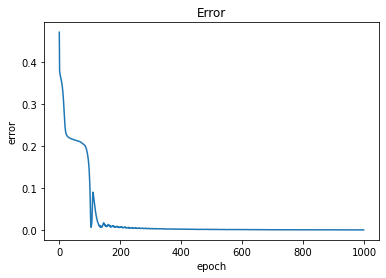

In [9]:
plt.xlabel("epoch")
plt.ylabel("error")
plt.title("Error")
plt.plot(range(len(net.error_tape)), net.error_tape)

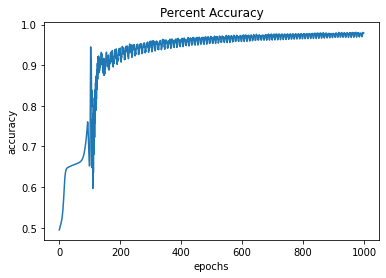

In [10]:
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Percent Accuracy")
plt.plot(range(len(net.accuracy_tape)), net.accuracy_tape)

In [11]:
print(net.accuracy_tape[-1])

0.9788311393967176


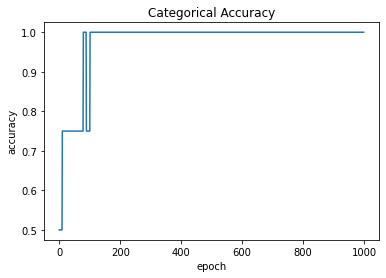

In [12]:
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Categorical Accuracy")
plt.plot(range(len(net.cat_accuracy_tape)), net.cat_accuracy_tape)